<center>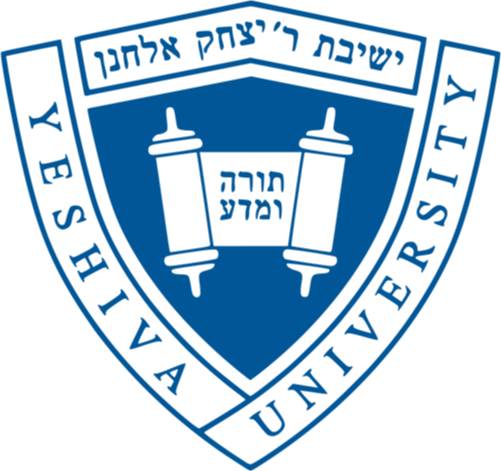</center>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5005 Machine Learning</h1>
<p>
<h2 style='text-align: center;'>Homework 06</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<br>
<br>

## 1. Implement Matrix Factorization using numpy (70 points)

In [17]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

In [18]:
def error_func(A, C, U, beta):
    return np.linalg.norm(A - C @ U, 'fro')**2 + beta * (np.linalg.norm(C, 'fro')**2 + np.linalg.norm(U, 'fro')**2)

In [19]:

def matrix_factorization(A, K, steps, alpha, beta):
    """
    A: user-item rating matrix
    K: number of latent features
    steps: number of iterations to perform the optimization
    alpha: learning rate
    beta: regularization parameter
    """
    
    # m - numer of users; n - number of items 
    m, n = A.shape

    # Loss fun log
    loss_values = []

    # Random seed for reproduction
    np.random.seed(2023)

    # Initialize the C and U matrices 
    C = np.random.normal(scale = 1 / K, size = (m, K))
    U = np.random.normal(scale = 1 / K, size = (K, n))

    # Update of C and U through iterations (SGD update)
    for _ in range(steps):
        C_old = C
        U_old = U

        E = A - C_old @ U_old
        
        g_C = (2 * E @ U_old.T - beta * C_old)
        g_U = (2 * C_old.T @ E  - beta * U_old)


        C = C_old + alpha * g_C
        U = U_old + alpha * g_U

        loss_values.append(error_func(A, C, U, beta))

    return C, U, loss_values

In [20]:
K = 4
steps = 1000
alpha = 0.01
beta = 0.001

In [21]:
# show the results of A
A = np.array([[5, 3, 0, 1],
              [4, 0, 0, 1],
              [1, 1, 0, 5],
              [1, 0, 0, 4],
              [0, 1, 5, 4]])

C, U, loss_values = matrix_factorization(A, K, steps, alpha, beta)
print(f"C = \n{C}")
print(f"\nU = \n{U}")

C = 
[[-1.68713722 -0.39011234  1.36112752 -0.60813256]
 [-0.34626685 -0.63065388  1.53498432  0.76394812]
 [-0.77737465 -1.71891363 -0.62598779  0.08276708]
 [-0.29814951 -1.47196231 -0.25546049  0.51126493]
 [-1.64436193  0.19161531 -1.02273246  1.48336851]]

U = 
[[-1.23113944 -1.40737781 -1.23834118 -1.2227131 ]
 [-0.74043366 -0.01633368  0.86350681 -1.97556149]
 [ 1.97694532  0.08628799 -0.64274883 -0.91610908]
 [ 0.09394344 -0.82441647  1.44295233  0.96460549]]


In [22]:
print(f"C @ U = \n{C @ U}")

C @ U = 
[[ 4.99969811e+00  2.99961491e+00  1.74256960e-05  1.00002639e+00]
 [ 3.99960813e+00  2.68482239e-04 -4.60644615e-05  9.99976014e-01]
 [ 1.00002990e+00  9.99886243e-01  1.43282310e-04  4.99963642e+00]
 [ 9.99952635e-01  1.13170869e-04  8.91879368e-05  3.99970199e+00]
 [ 2.69670167e-05  9.99945745e-01  4.99953235e+00  3.99983494e+00]]


## 2. Plot the error of SGD (10 points)

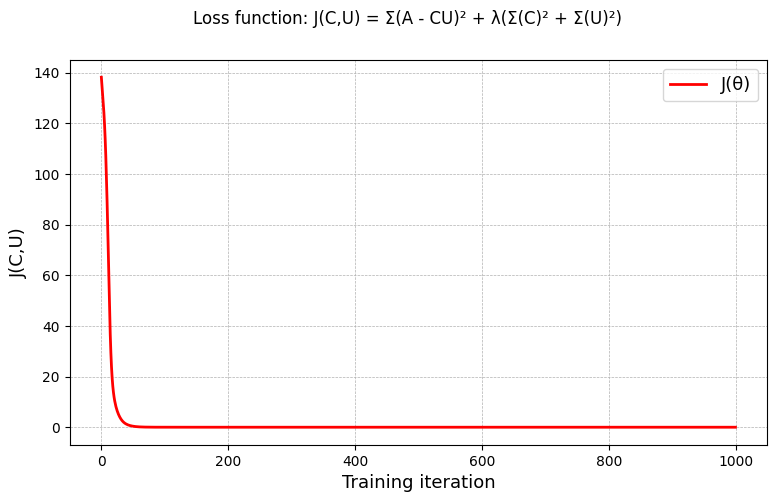

In [23]:
plt.figure(figsize = (9, 5))
plt.plot(loss_values, 'r-', linewidth = 2.0, label = 'J(θ)')
plt.suptitle(r"Loss function: J(C,U) = Σ(A - CU)² + λ(Σ(C)² + Σ(U)²)")
plt.xlabel('Training iteration', fontsize = 13)
plt.ylabel('J(C,U)', fontsize = 13)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend(fontsize = 13)
plt.show()

In [32]:
# Final error
print(f"np.linalg.norm(A - C @ U, 'fro')**2 = {np.linalg.norm(A - C @ U, 'fro')**2}")

np.linalg.norm(A - C @ U, 'fro')**2 = 9.96762817638322e-07


## 3. Compare the results with NMF from sklearn (10 points)

In [25]:
nmf_model = NMF(n_components = K, max_iter = steps)

In [26]:
# Fit the model to the user-item ratings matrix
nmf_model.fit(A)

NMF(max_iter=1000, n_components=4)

In [27]:
C_nmf = nmf_model.transform(A)
U_nmf = nmf_model.components_

In [28]:
print(f"C_nmf = \n{C_nmf}")
print(f"\nU_nmf = \n{U_nmf}")

C_nmf = 
[[2.43846282e-01 5.32242875e-03 1.14981438e-01 7.46412709e-06]
 [4.88129654e-01 0.00000000e+00 5.19586182e-03 0.00000000e+00]
 [0.00000000e+00 1.77333939e-03 1.12294031e+00 1.26108843e-05]
 [1.22032414e-01 0.00000000e+00 8.43507540e-01 0.00000000e+00]
 [2.44651396e-15 0.00000000e+00 6.01326647e-01 1.79141106e+00]]

U_nmf = 
[[8.19454416e+00 0.00000000e+00 0.00000000e+00 2.00124088e+00]
 [5.64006742e+02 5.63627143e+02 0.00000000e+00 5.81824514e-03]
 [0.00000000e+00 2.80565815e-04 0.00000000e+00 4.45257873e+00]
 [0.00000000e+00 5.58124996e-01 2.79109587e+00 7.38270402e-01]]


In [29]:
print(f"C_nmf @ U_nmf = \n{C_nmf @ U_nmf}")

C_nmf @ U_nmf = 
[[5.00009482e+00 2.99990173e+00 2.08330943e-05 9.99995529e-01]
 [4.00000000e+00 1.45778121e-06 0.00000000e+00 1.00000000e+00]
 [1.00017537e+00 9.99824311e-01 3.51981870e-05 4.99999975e+00]
 [1.00000000e+00 2.36659381e-04 0.00000000e+00 3.99999999e+00]
 [2.00480666e-14 1.00000000e+00 5.00000000e+00 4.00000000e+00]]


In [34]:
# Final error
print(f"np.linalg.norm(A - C_nmf @ U_nmf, 'fro')**2 = {np.linalg.norm(A - C_nmf @ U_nmf, 'fro')**2}")

np.linalg.norm(A - C_nmf @ U_nmf, 'fro')**2 = 1.3797310697030152e-07


## 4. Explain the differences and why (10 points)

#### __My custom-defined function outperformed Sklearn's NFM in terms of error despite using the same number of iterations. The results obtained from the decomposed matrix and NMF method were similar, but not identical due to differences in the initialization of C and U matrices as well as slight variations in the regularization parts of the loss function. The use of randomly initialized matrices can lead to a slower convergence of the cost function in Sklearn's NFM. Additionally, the regularization parts of the loss function led to different calculations of the SGD between Sklearn's NFM and my custom-defined function, contributing to differences in the final results.__

# References

- Matrix Factorization for Recommender Systems : https://everdark.github.io/k9/notebooks/ml/matrix_factorization/matrix_factorization.nb.html

- NumPy: Calculate the Frobenius norm and the condition number of a given array : https://www.w3resource.com/python-exercises/numpy/linear-algebra/numpy-linear-algebra-exercise-19.php

- Sort eigenvalues and associated eigenvectors after using numpy.linalg.eig in python : https://stackoverflow.com/questions/8092920/sort-eigenvalues-and-associated-eigenvectors-after-using-numpy-linalg-eig-in-pyt

- Non-negative matrix factorization : https://goldinlocks.github.io/Non-negative-matrix-factorization/

- sklearn.decomposition.NMF : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html